<img src="https://raw.githubusercontent.com/israeldi/quantlab/blob/master/assets/images/Program%20Logo%20for%20email%20signatures.png" width="200px" align="right">

# QuantLab: Stochastics
### [(Go to Quant Lab)](https://israeldi.github.io/quantlab/)

#### Source: Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="200px" align="left">

### - [Link](https://drive.google.com/open?id=1Vhnq0LzJ-QOoKyUwyzMN4Pvh0w40IW0X) to textbook

## Table of Contents

1. [Random Numbers](#1.-Random-Numbers)
2. [Plotting Random Samples](#2.-Plotting-Random-Samples)
3. [Simulation](#3.-Simulation)
    - 3.1 [Random Variables](#3.1-Random-Variables)
    - 3.2 [Stochastic Processes](#3.2-Stochastic-Processes)
        - 3.2.1 [Geometric Brownian Motion](#3.2.1-Geometric-Brownian-Motion)
        - 3.2.2 [Square-Root Diffusion](#3.2.2-Square-Root-Diffusion)
        - 3.2.3 [Stochastic Processes](#3.2-Stochastic-Processes)
        - 3.2.4 [Stochastic Processes](#3.2-Stochastic-Processes)
    - 3.3 [Variance Reduction](#3.3-Variance-Reduction)
4. [Valuation](#4.-Valuation)
    - 4.1 [European Options](#4.1-European-Options)
    - 4.2 [American Options](#4.2-American-Options)
5. [Risk Measures](#5.-Risk-Measures)
    - 5.1 [Value-at-Risk](#5.1-Value-at-Risk)
    - 5.2 [Credit Value Adjustments](#5.2-Credit-Value-Adjustments)


Initially import all the modules we will be using for our notebook

In [1]:
import math
import numpy as np
import numpy.random as npr  
from pylab import plt, mpl
import os

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
# Directory where we will save our plots
directory = "./images"
if not os.path.exists(directory):
    os.makedirs(directory)

## 5. Risk Measures
#### ([Back to Top](#Table-of-Contents))

### 5.1 Value-at-Risk

In [4]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000

In [5]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
             sigma * np.sqrt(T) * npr.standard_normal(I))  

In [6]:
R_gbm = np.sort(ST - S0)  

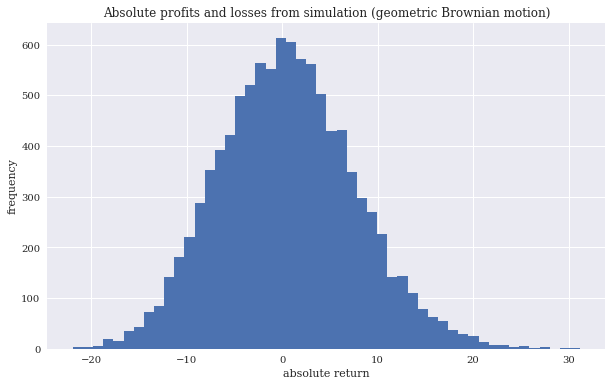

In [328]:
plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50)
plt.title('Absolute profits and losses from simulation (geometric Brownian motion)')
plt.xlabel('absolute return')
plt.ylabel('frequency');
plt.savefig('./images/stoch_18.png');

In [329]:
import warnings
warnings.simplefilter('ignore')

In [330]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           21.814
           99.90           18.837
           99.00           15.230
           97.50           12.816
           95.00           10.824
           90.00            8.504


In [331]:
dt = 30. / 365 / M
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

In [332]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * math.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

In [333]:
R_jd = np.sort(S[-1] - S0)

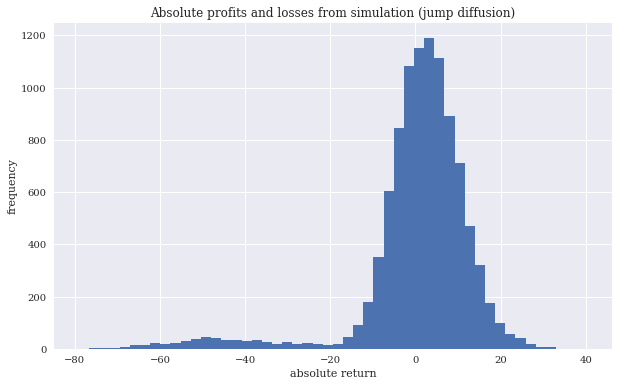

In [334]:
plt.figure(figsize=(10, 6))
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');
plt.title('Absolute profits and losses from simulation (jump diffusion)')
plt.savefig('./images/stoch_19.png');

In [335]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           76.520
           99.90           69.396
           99.00           55.974
           97.50           46.405
           95.00           24.198
           90.00            8.836


In [336]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

### 5.2 Credit Value Adjustments
#### ([Back to Top](#Table-of-Contents))

In [74]:
import random
random.seed(0) 

S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

# Black-Scholes Model
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

# Loss Level
L = 0.5

# Probability of Default
p = 0.01  

# Simulate Default Events
D = npr.poisson(p * T, I) 

(array([9.9046e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.4800e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

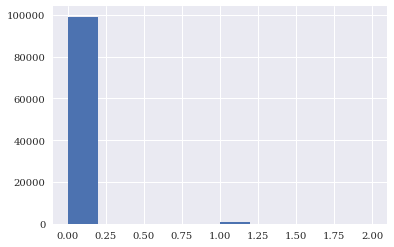

In [72]:
plt.hist(D)

In [78]:
# Limits defaults to one such event.
D = np.where(D > 1, 1, D)

Without default, the risk-neutral value of the future index level should be equal to the current value of the
asset today (up to differences resulting from numerical errors). The CVaR and the present value of the asset,
adjusted for the credit risk, are given as follows:

In [83]:
# Discounted average simulated value of the asset at T
math.exp(-r * T) * np.mean(ST) 

99.98824027507536

In [84]:
# CVaR as the discounted average of the future losses in the 
# case of a default
CVaR = math.exp(-r * T) * np.mean(L * D * ST)  
CVaR  

0.5207921146158452

In [14]:
# Discounted average simulated value of the asset at T, adjusted for the simulated losses 
# from default.
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST)  
S0_CVA  

99.61385748321064

In [15]:
# Current price of the asset adjusted by the simulated CVaR
S0_adj = S0 - CVaR  
S0_adj 

99.51363360840696

In this particular simulation example, one observes roughly 1,000 losses due to credit risk, which is to be
expected given the assumed default probability of 1% and 100,000 simulated paths. Figure 12-21 shows the
complete frequency distribution of the losses due to a default. Of course, in the large majority of cases (i.e.,
in about 99,000 of the 100,000 cases) there is no loss to observe:

In [16]:
# Number of default events and therewith loss events.
np.count_nonzero(L * D * ST)

981

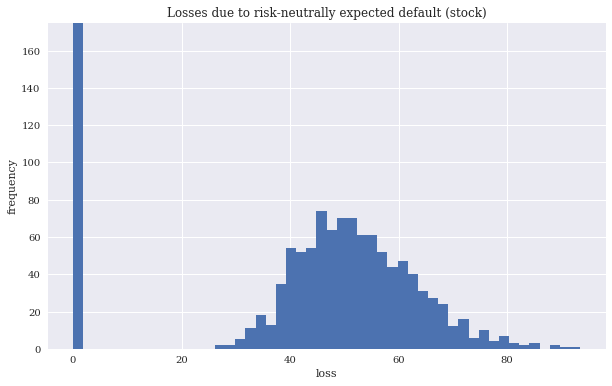

In [351]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * ST, bins=50)
plt.title('Losses due to risk-neutrally expected default (stock)')
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=175);
plt.savefig('./images/stoch_21.png');

Consider now the case of a European call option. Its value is about 10.4 currency units at a strike of 100.
The CVaR is about 5 cents given the same assumptions with regard to probability of default and loss level:

In [18]:
K = 100.
hT = np.maximum(ST - K, 0)

# The Monte Carlo estimator value for the European call option.
C0 = math.exp(-r * T) * np.mean(hT)  
C0  

10.529860685392606

In [19]:
# The CVaR as the discounted average of the future losses in 
# the case of a default.
CVaR = math.exp(-r * T) * np.mean(L * D * hT)  
CVaR  

0.04760136691503271

In [20]:
# The Monte Carlo estimator value for the European call option, 
# adjusted for the simulated losses from default.
C0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * hT)  
C0_CVA  

10.48225931847757

Compared to the case of a regular asset, the option case has somewhat different characteristics. One only
sees a little more than 500 losses due to a default, although there are again 1,000 defaults in total. This
results from the fact that the payoff of the option at maturity has a high probability of being zero. Figure 12-
22 shows that the CVaR for the option has quite a different frequency distribution compared to the regular
asset case:

In [21]:
# The number of losses due to default.
np.count_nonzero(L * D * hT) 

539

In [22]:
# The number of defaults.
np.count_nonzero(D)  

981

In [23]:
# The number of cases for which the option expires worthless.
I - np.count_nonzero(hT) 

43886

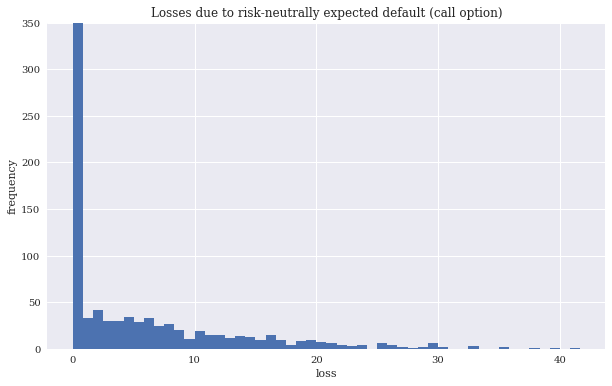

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * hT, bins=50)
plt.title('Losses due to risk-neutrally expected default (call option)')
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=350);
plt.savefig('./images/stoch_22.png');

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>